
# Avaliação Prática — Fundamentos de Pandas (Módulo 3)

Esta avaliação contém **10 questões** de nível introdutório sobre **Pandas** e **análise de dados**.
O foco é demonstrar domínio das operações básicas de **importação**, **inspeção** e **manipulação simples** de DataFrames.

**Instruções gerais:**
- Responda **apenas** nas células de código logo abaixo de cada enunciado.
- Execute a célula **Setup** antes de começar.
- Utilize o arquivo CSV fornecido: **`avaliacao_empresa.csv`** (na mesma pasta deste notebook).

In [ ]:

# Setup (execute esta célula primeiro — não alterar)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
print("Ambiente pronto.")


Ambiente pronto.


### Questão 1) Importe o arquivo CSV e crie um DataFrame chamado `df`.

In [2]:
# Insira o código que importa o .csv e o transforma em DataFrame (há um método que faz as duas coisas)
# Dica: use pd.read_csv(...)
# CAMINHO = "avaliacao_empresa.csv"
df = pd.read_csv('avaliacao_empresa.csv')

### Questão 2) Mostre os **5 primeiros** elementos do DataFrame.

In [13]:
# Escreva o comando para visualizar as 5 primeiras linhas do DataFrame
# ...
df.head(5)

,id_funcionario,nome,departamento,turno,cidade,data,vendas_qtd,ticket_medio,faturamento,custo,lucro,horas_trabalhadas,salario,mes
0,2,Bruno,Operacoes,Tarde,Campinas,2025-01-01,56,975.0,54600.0,41435.15,13164.85,166,8086,2025-01
1,3,Carla,TI,Noite,Sao Paulo,2025-01-08,50,415.0,20750.0,10791.38,9958.62,142,8703,2025-01
2,4,Diego,Vendas,Manha,Campinas,2025-01-15,55,107.0,5885.0,4287.17,1597.83,130,8221,2025-01
3,5,Elaine,Operacoes,Tarde,Sao Paulo,2025-01-22,11,755.0,8305.0,4328.67,3976.33,147,4954,2025-01
4,6,Fabio,TI,Noite,Campinas,2025-01-29,44,456.0,20064.0,11597.60,8466.40,158,6378,2025-01


### Questão 3) Exiba as **informações gerais** do DataFrame (tipos de dados e nulos).

In [12]:
# Use o método apropriado para ver tipos de dados e contagem de nulos
# ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_funcionario     26 non-null     int64         
 1   nome               26 non-null     object        
 2   departamento       26 non-null     object        
 3   turno              26 non-null     object        
 4   cidade             26 non-null     object        
 5   data               26 non-null     datetime64[ns]
 6   vendas_qtd         26 non-null     int64         
 7   ticket_medio       26 non-null     float64       
 8   faturamento        26 non-null     float64       
 9   custo              26 non-null     float64       
 10  lucro              26 non-null     float64       
 11  horas_trabalhadas  26 non-null     int64         
 12  salario            26 non-null     int64         
 13  mes                26 non-null     object        
dtypes: datetime6

### Questão 4) Mostre o **formato (linhas, colunas)** e a **lista de colunas** do DataFrame.

In [ ]:
# Mostre df.shape e df.columns
# ...
df.shape
df.columns


(26, 14)

### Questão 5) Exiba as **estatísticas descritivas** das colunas numéricas (média, min, max, etc.).

In [56]:
# Utilize o método para estatísticas descritivas
# ...
df['vendas_qtd'].describe

<bound method NDFrame.describe of 0     56
1     50
2     55
3     11
4     44
5     37
6     43
7     51
8     29
9     49
10    19
11    10
12    44
13    41
14    15
15     7
16    44
17    40
18    37
19    27
20    29
21    57
22     7
23    57
24    32
25    51
Name: vendas_qtd, dtype: int64>

### Questão 6) Selecione apenas as colunas `nome` e `departamento` e mostre as **5 primeiras** linhas.

In [25]:
# Selecione as colunas solicitadas e mostre 5 primeiras linhas
# ...
# Utilize o método para estatísticas descritivas
df[['nome', 'departamento']].head(5)




,nome,departamento
0,Bruno,Operacoes
1,Carla,TI
2,Diego,Vendas
3,Elaine,Operacoes
4,Fabio,TI


### Questão 7) Filtre os registros do **turno 'Noite'** e **conte** quantos registros existem.

In [ ]:
# Filtre df['turno'] == 'Noite' e conte as linhas resultantes
# ...
df['turno'] == 'Noite'

0     False
1      True
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15    False
16     True
17    False
18    False
19     True
20    False
21    False
22     True
23    False
24    False
25     True
Name: turno, dtype: bool

### Questão 8) O código abaixo converte as datas de texto para data e em seguida cria uma coluna mês para os dados.
Mostre as **5 primeiras** linhas de `df[['data','mes']]`.

In [28]:
df['data']=pd.to_datetime(df['data'],errors='coerce')
df['mes']=df['data'].dt.to_period('M').astype(str)
df[['data','mes']]
#Insira o seu código aqui
df[['data','mes']].head(5)

,data,mes
0,2025-01-01,2025-01
1,2025-01-08,2025-01
2,2025-01-15,2025-01
3,2025-01-22,2025-01
4,2025-01-29,2025-01


### Questão 9) O código abaixo agrupa e soma os valores por mes no DataFrame fat.
Mostre os **3 meses** com maior faturamento.

In [ ]:
fat = df.groupby('mes',as_index=False)['faturamento'].sum()
fat = df.groupby('faturamento')


       mes  faturamento
0  2025-01     109604.0
1  2025-02      94936.0
2  2025-03     113759.0
3  2025-04     106237.0
4  2025-05      82651.0
5  2025-06     135267.0


### Questão 10) Calcule a **média de salário por departamento** e mostre em **ordem decrescente**.

In [38]:
#df.groupby('departamento',as_index=False)['salario'].mean().sort_values('salario',ascending=False)
salarios_por_departamento = df.groupby('departamento',as_index=False)['salario']
#Insira seu código aqui
df.groupby('departamento',as_index=False)['salario'].mean().sort_values('salario',ascending=False)

,departamento,salario
1,TI,6795.444444
2,Vendas,6554.875000
0,Operacoes,6239.111111



---
## Extra (não avaliativo) — Demonstração de visualização

O gráfico abaixo mostra a **distribuição do faturamento por mês e por departamento** (barras empilhadas).  
**Ação do aluno:** **apenas execute** a célula para observar o resultado e refletir sobre variações por mês e por área.


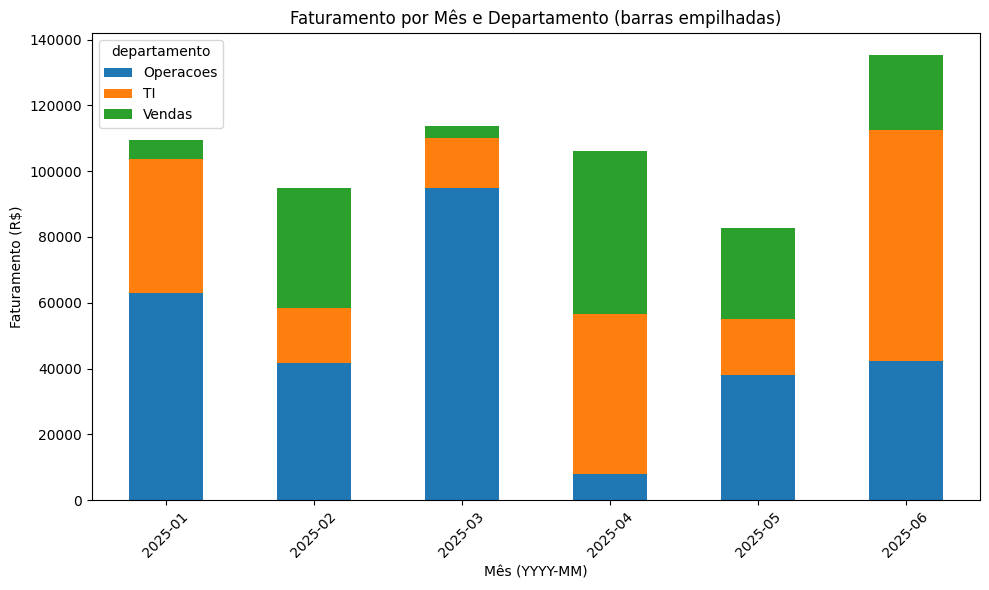

In [11]:

# ▶️ Execute esta célula (não alterar o código)
# Pré-requisitos: df já carregado; coluna 'data' convertida; coluna 'mes' criada (Questões 1 e 8).
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df['mes'] = df['data'].dt.to_period('M').astype(str)

fat_mes_dep = df.groupby(['mes','departamento'], as_index=False)['faturamento'].sum()
pivot = fat_mes_dep.pivot(index='mes', columns='departamento', values='faturamento').fillna(0)

ax = pivot.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_title("Faturamento por Mês e Departamento (barras empilhadas)")
ax.set_xlabel("Mês (YYYY-MM)")
ax.set_ylabel("Faturamento (R$)")
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
